### 工作進度  
* 【置頂】**筆記內容架構**與**量化技術分析系統**相關資訊請參閱[251201筆記.ipynb](https://github.com/yilintung/StockInvestmentNotebook/blob/main/251201%E7%AD%86%E8%A8%98.ipynb)之「工作進度」。  

* 引入模組與定義公用函式  

In [1]:
import numpy as np
import mysys
import markdown
from IPython.core.display import HTML

In [2]:
def stock_analysis( analysis, stock_id, buttom_pattern = False) :
    results,images = analysis.analysis(stock_id)
    if buttom_pattern is True and '底部型態' in images :
        print('底型反轉交易策略：')
        display(images['底部型態'])
    print('解盤內容：')
    if '整體評價' in images :
        display(images['整體評價'])
    result_md   = results.to_markdown(tablefmt="grid")
    result_html = markdown.markdown(result_md, extensions=['markdown_grid_tables:GridTableExtension'])
    display(HTML(result_html))

* 更新量化技術分析資料庫  

In [3]:
mysys.UpdatestockDatabase()

2025-12-22 21:26:38.977 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockInfo, data_id: 


##### 更新台股總覽 #####
新增股票代碼。代碼 ＝ 009814：股票名稱 ＝ 富邦標普500，產業類別 ＝ 上櫃ETF，類型 ＝ tpex
新增股票代碼。代碼 ＝ 00990A：股票名稱 ＝ 主動元大AI新經濟，產業類別 ＝ ETF，類型 ＝ twse
修改股票資訊。代碼 ＝ 1471：股票名稱 ＝ 首利，產業類別 ＝ 電子零組件業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1710：股票名稱 ＝ 東聯，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1713：股票名稱 ＝ 國化，產業類別 ＝ 化學工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1730：股票名稱 ＝ 花仙子，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1733：股票名稱 ＝ 五鼎，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1760：股票名稱 ＝ 寶齡富錦，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 1762：股票名稱 ＝ 中化生，產業類別 ＝ 化學生技醫療，類型 ＝ twse
修改股票資訊。代碼 ＝ 1783：股票名稱 ＝ 和康生，產業類別 ＝ 生技醫療業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2059：股票名稱 ＝ 川湖，產業類別 ＝ 電子零組件業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2303：股票名稱 ＝ 聯電，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2305：股票名稱 ＝ 全友，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2317：股票名稱 ＝ 鴻海，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2321：股票名稱 ＝ 東訊，產業類別 ＝ 通信網路業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2331：股票名稱 ＝ 精英，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2345：股票名稱 ＝ 智邦，產業類別 ＝ 通信網路業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2350：股票名稱 ＝ 環電，產業類別 ＝ 電子工業，類型 ＝ twse
修改股票資訊。代碼 ＝ 2352：股票名稱 ＝ 佳世達，產業類別 ＝ 電腦及週邊設備業，類型 ＝ twse
修改股票資訊。代

2025-12-22 21:26:39.771 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-12


2025-12-22 21:26:46.914 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-22 21:26:51.526 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-22 21:26:55.409 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-15
【新建】週Ｋ：2025-12-15


2025-12-22 21:27:04.828 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-16


2025-12-22 21:27:12.346 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-17


2025-12-22 21:27:19.870 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【略過】日Ｋ：2025-12-18


2025-12-22 21:27:27.042 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【更新】日Ｋ：2025-12-19


2025-12-22 21:27:33.936 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-22 21:27:37.667 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 
2025-12-22 21:27:41.566 | INFO     | FinMind.data.finmind_api:get_data:171 - download TaiwanStockPrice, data_id: 


【新建】日Ｋ：2025-12-22


* 建立「解盤」物件    

In [4]:
analysis = mysys.StockAnalysis()

### 大盤解盤  

* 加權指數  

> **開盤**：加權指數開高，短線持續反彈。  
> 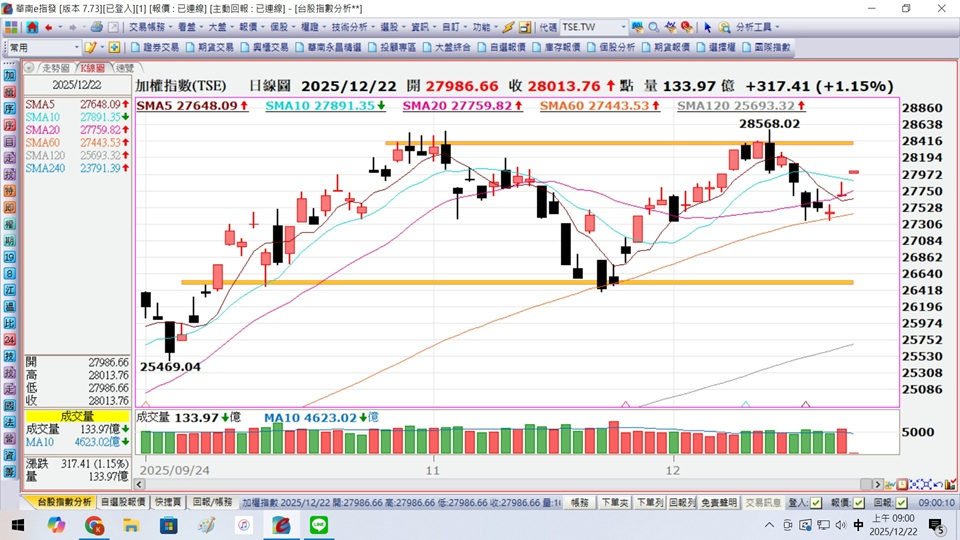  

In [5]:
# 盤整區間
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-10-18'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-12-10']['Close']
    
    # 支撐線
    support_line_start_date = '2025-09-30'
    support_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    support_line_price      = range_prices.loc['2025-11-24']['Close']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)],
        [(support_line_start_date,support_line_price),(support_line_end_date,support_line_price)]
    ]

    linewidths=[2.5,2.5]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

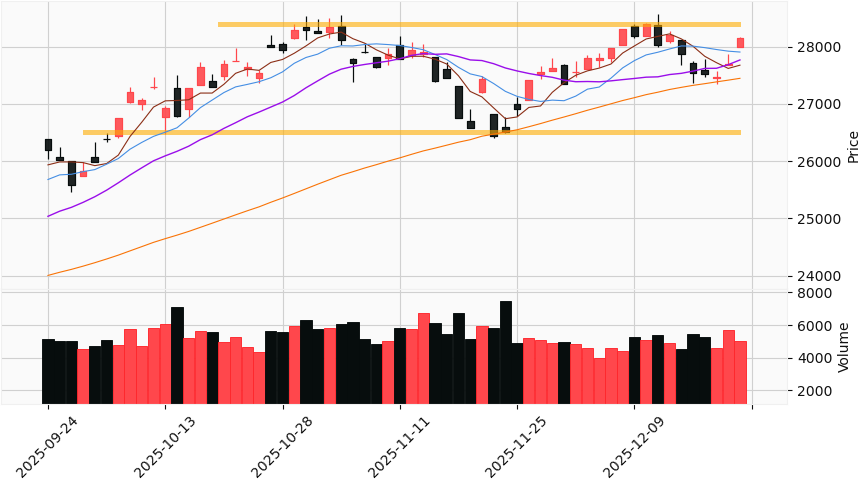

In [6]:
# 收盤：盤整區間
image = mysys.DrawOnKlineChart('TAIEX','2025-09-24','2025-12-22',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


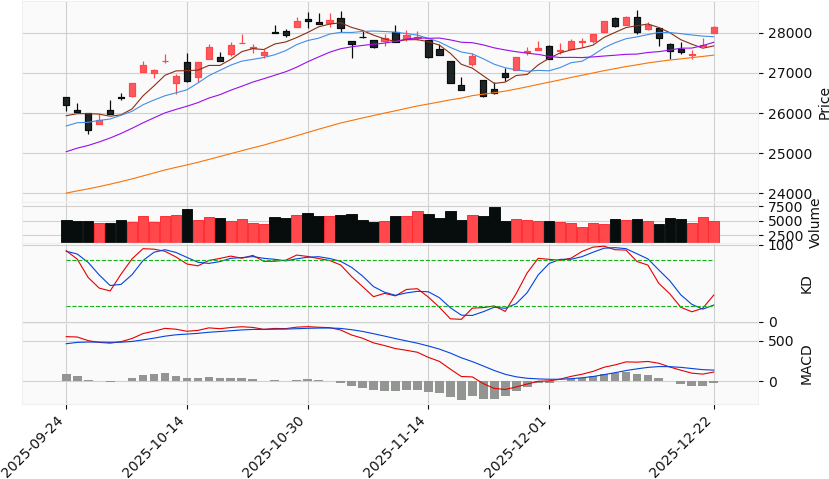

技術分析工具,解盤內容
Ｋ線／Ｋ棒,"紡錘線 : 2025-12-18 , 2025-12-19 十字線 : 2025-12-18 , 2025-12-19"
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 5044.72億元 ，十日均量 ＝ 5116.04億元）
型態,盤整型態之矩形，型態範圍由2025-10-31開始到2025-12-19結束。 底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-06-10時已達估算之目標價（22257.56點）。
移動平均線,5日線上揚、10日線下彎，短期盤整；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-19黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-01當週黃金交叉。
整體評價,技術分析 價格趨勢 近期價格呈現上漲趨勢，尤其在最後一個交易日出現明顯的紅K線，顯示多頭力量增強。短期移動平均線（5日、10日）向上，且價格突破中期移動平均線（20日、60日），顯示短期上漲動能強勁。 價量關係 成交量在上漲時有所增加，顯示價量配合良好，支持價格上漲趨勢。這表明市場對於當前價格的上漲有較強的信心。 支撐與壓力 - 支撐位：短期支撐位可參考20日移動平均線附近。 - 壓力位：壓力位可參考近期高點，約在28150點附近。 KD指標解讀 KD指標顯示K線上穿D線，並從超賣區回升，顯示短期內有反彈的動能。這通常是買入信號，表明市場可能會繼續上漲。 MACD指標解讀 MACD指標中，DIF線與MACD線的距離縮小，且柱狀體由負轉正，顯示空頭力量減弱，多頭力量增強，支持價格上漲。 綜合評價 綜合以上分析，當前市場呈現上漲趨勢，短期內有望繼續走高。建議投資者可考慮逢低買入，並在接近壓力位時考慮停利。若價格跌破支撐位，則需謹慎觀察，考慮停損。


In [7]:
# 盤後：加權指數解盤
stock_analysis(analysis,'TAIEX')

* 櫃買指數  

> **開盤**：櫃買指數反彈力道更強，已經逼近前高。  
> 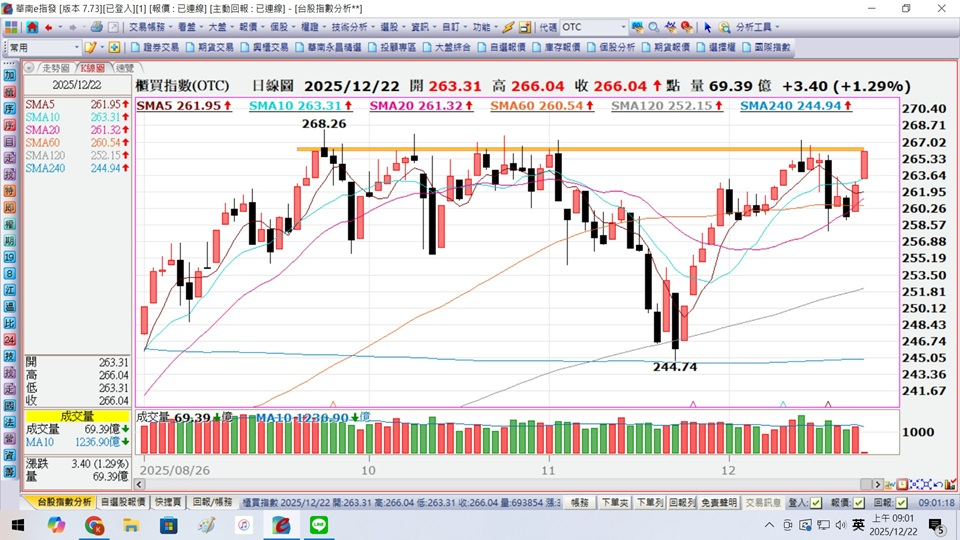  

In [8]:
# 壓力線
def line_drawing_callback( range_prices) :

    # 壓力線
    resistance_line_start_date = '2025-09-18'
    resistance_line_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    resistance_line_price      = range_prices.loc['2025-09-23']['Open']
    
    seq_of_seq_of_points=[
        [(resistance_line_start_date,resistance_line_price),(resistance_line_end_date,resistance_line_price)]
    ]

    linewidths=[2.5]
    
    colors=['xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

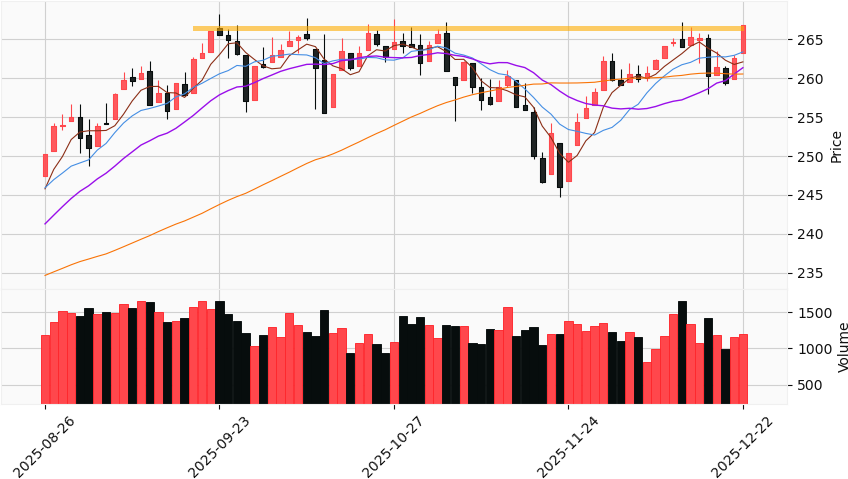

In [9]:
# 收盤：壓力線
image = mysys.DrawOnKlineChart('TPEx','2025-08-26','2025-12-22',line_drawing_callback)
display(image)

> **盤後**：量化技術分析  

解盤內容：


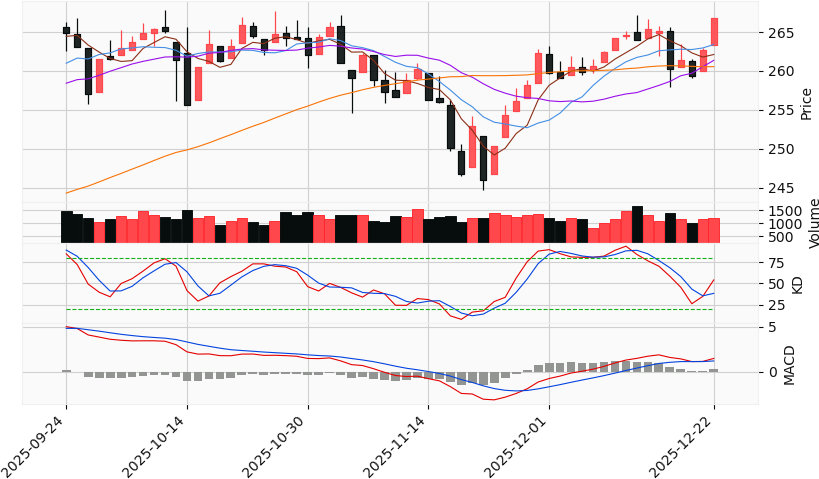

技術分析工具,解盤內容
Ｋ線／Ｋ棒,孕育線／懷抱線 : 2025-12-17
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：未至大量門檻（成交量 ＝ 1198.31億元 ，十日均量 ＝ 1266.91億元）
型態,底型反轉之底部型態，型態範圍由2025-04-02開始到2025-05-02結束，2025-08-18時已達估算之目標價（247.79點）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線上揚，長期翻多
ＫＤ指標,於2025-12-22黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-11-24當週黃金交叉。
整體評價,根據圖表分析： 價格趨勢 近期價格呈現上漲趨勢，尤其在最後一個交易日出現明顯的紅K線，顯示多頭力量強勁。短期移動平均線（5日、10日）向上穿越中期移動平均線（20日、60日），進一步確認上漲趨勢。 價量關係 成交量在最後一個交易日有所增加，與價格上漲相配合，顯示出多頭動能增強，價量配合良好。 支撐與壓力 支撐位可參考近期低點約在260點附近，而壓力位則在近期高點約在267點左右。 KD指標 KD指標顯示K線向上穿越D線，並且從低位回升，顯示出買盤力量增強，短期內有進一步上漲的可能。 MACD指標 MACD指標中，DIF線在MACD線之上，且柱狀體由負轉正，顯示出多頭趨勢增強，短期內有望持續上漲。 綜合評價 綜合以上分析，當前市場呈現多頭趨勢，短期內有望繼續上漲。建議投資者可考慮逢低買入，並在接近壓力位時適時停利。注意若價格回檔至支撐位以下，需考慮停損。


In [10]:
# 盤後：櫃買指數解盤
stock_analysis(analysis,'TPEx')

### 個股觀察  

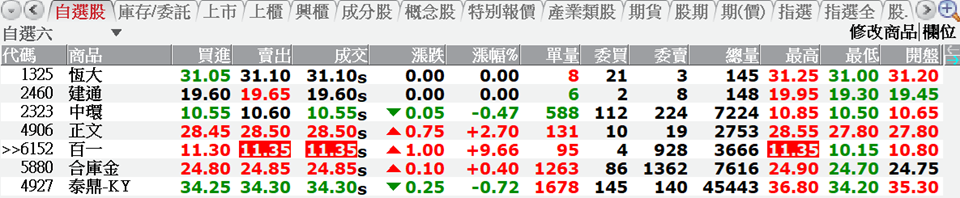  

* 聯電(2303)  
  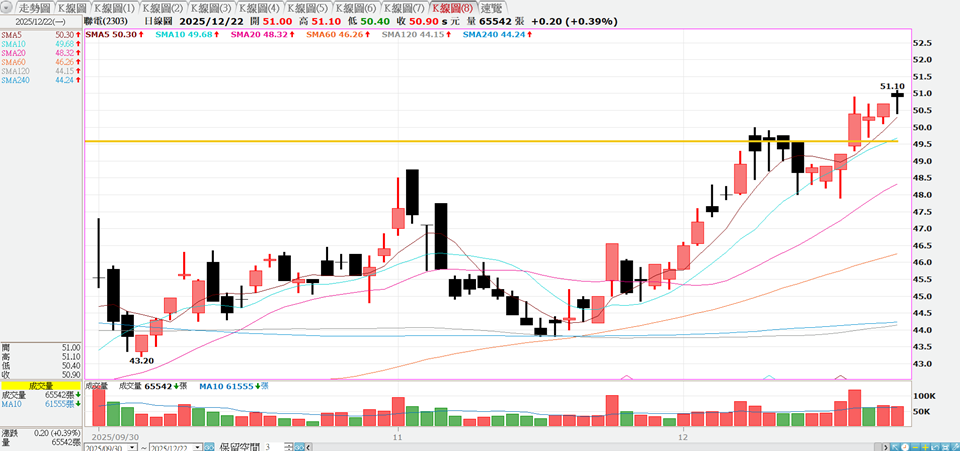  
* 泰鼎-KY(4927)  
  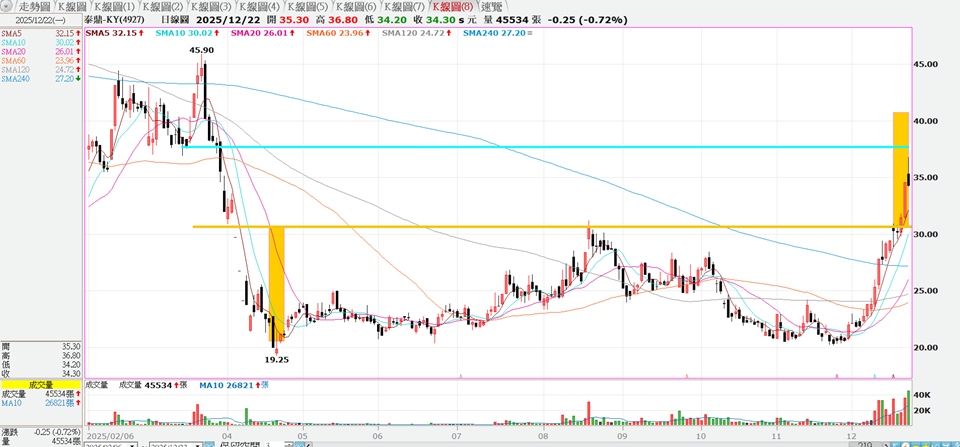  
* 力積電(6770)  
  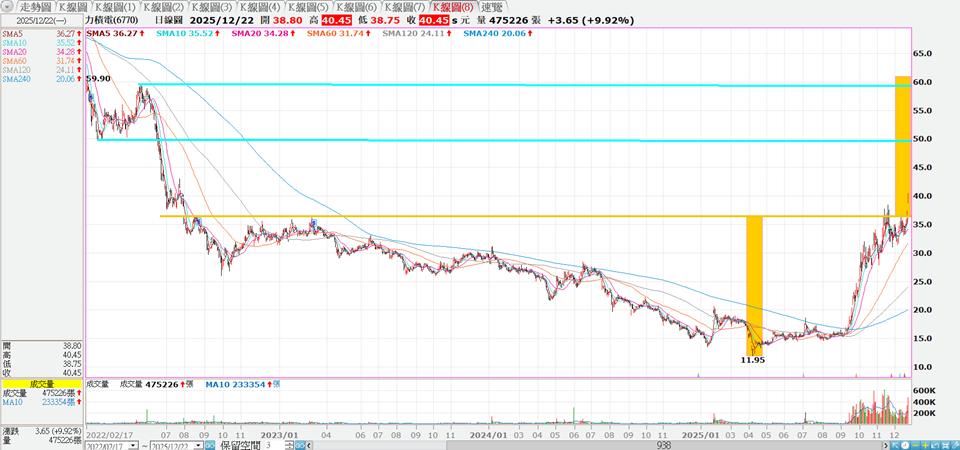  
* 華電網(6163)  
  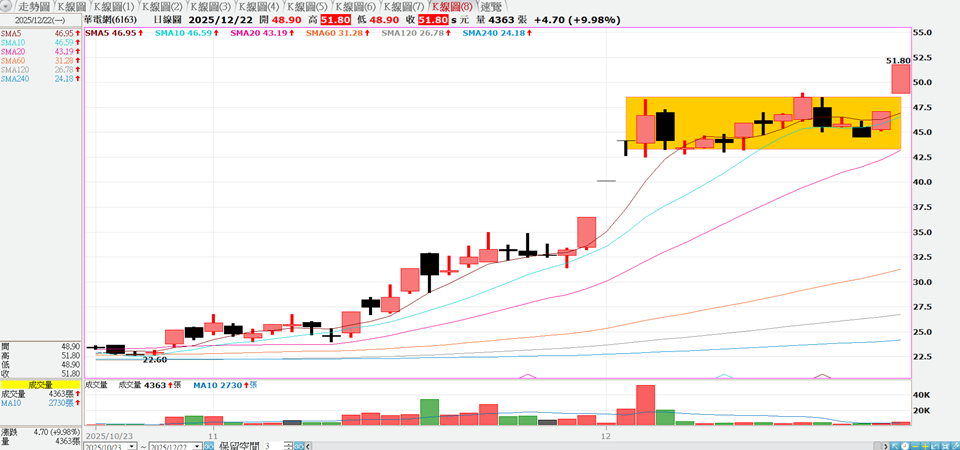  
* 福懋科(8131)  
  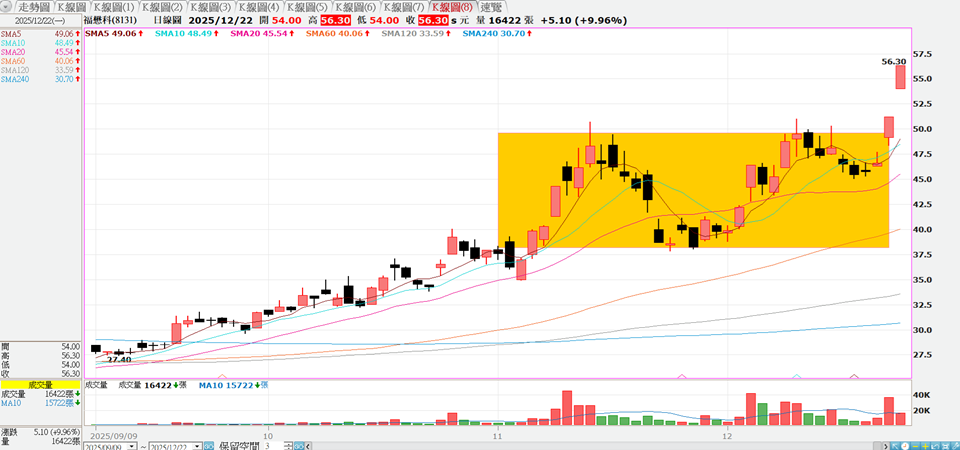  
* 富邦金(2881)  
  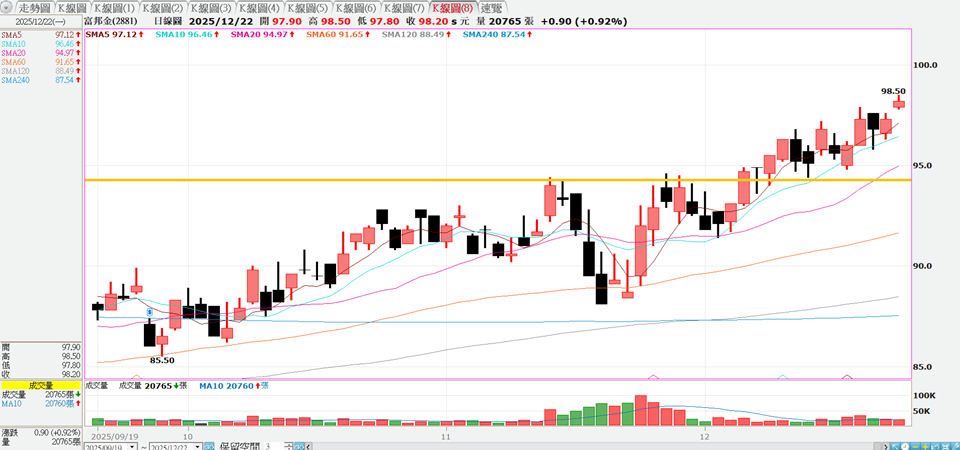  
* 國泰金(2882)  
  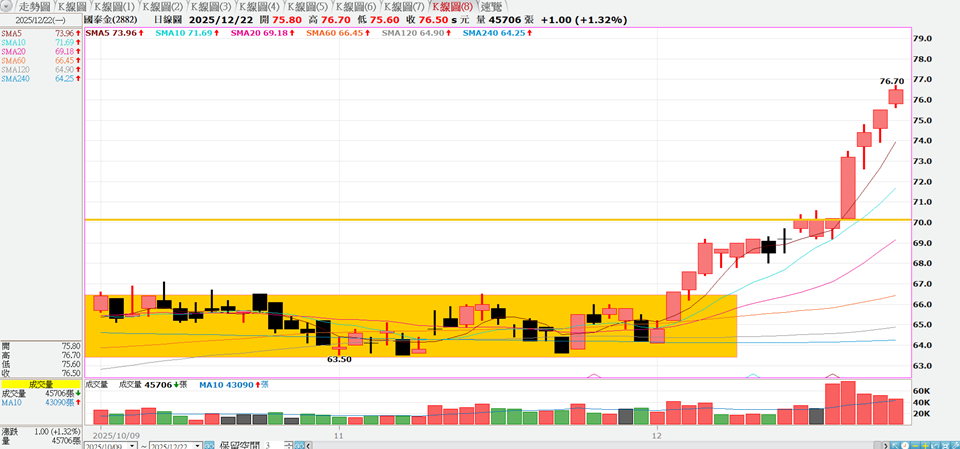  
* 百一(6152)  
  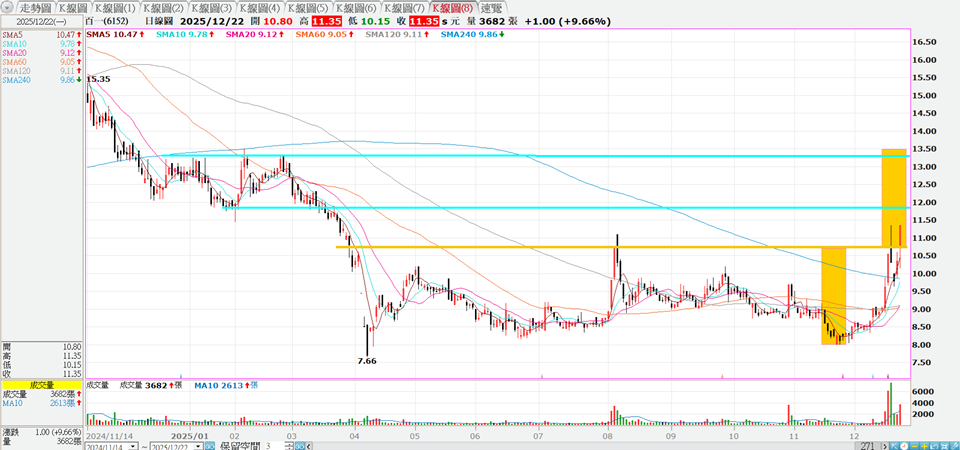  
* 新復興(4909)  
  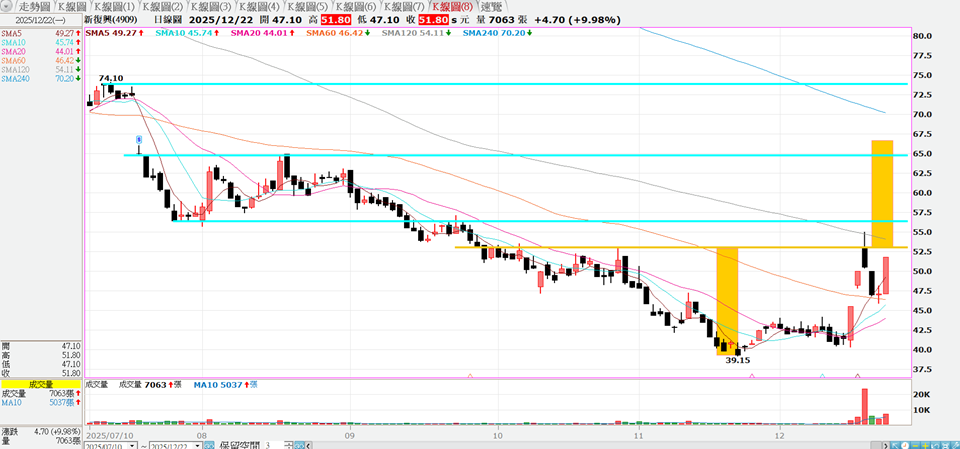  

### 個股解盤  

* 百一(6152)     
  看法：底型突破，但往上有盤整區間壓力。      

> **盤後**：量化技術分析  

解盤內容：


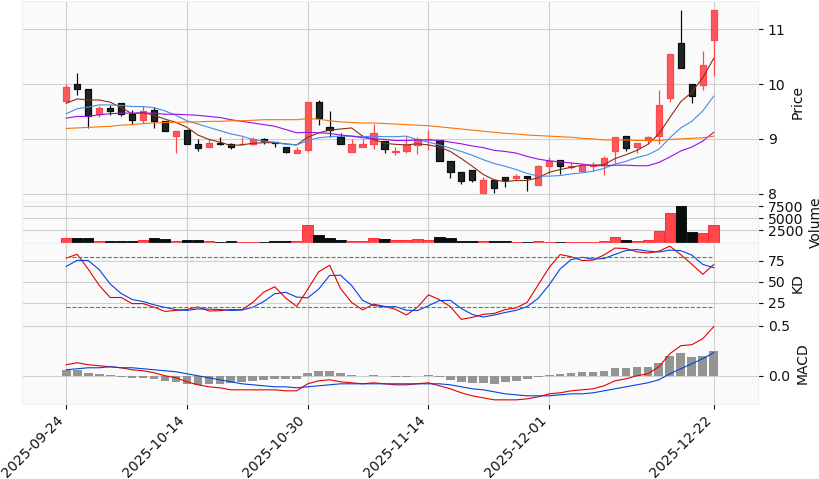

技術分析工具,解盤內容
Ｋ線／Ｋ棒,（未識別出Ｋ線型態）
Ｋ線圖,中期為高位階 長期為高位階
成交量,價量關係：大型股大量（成交量 ＝ 3682張 ，十日均量 ＝ 2613張）
型態,反轉型態之下降楔形，型態範圍由2025-08-06開始到2025-10-17結束。 底型反轉之底部型態，型態範圍由2025-05-28開始到2025-08-04結束，2025-08-05時已達估算之目標價（9.91元）。
移動平均線,5日線上揚、10日線上揚，短期翻多；20日線上揚、60日線上揚，中期翻多；120日線上揚、240日線下彎，長期盤整
ＫＤ指標,於2025-12-22黃金交叉。
ＭＡＣＤ指標,MACD在零軸以上，中期多方
週Ｋ－週ＫＤ指標,於2025-12-08當週黃金交叉。
整體評價,根據圖表分析： 價格趨勢 近期股價呈現明顯的上漲趨勢，尤其在最後幾個交易日中，價格突破了多條移動平均線，顯示出強勁的多頭動能。 價量關係 成交量在價格上漲時顯著增加，顯示出市場對此上漲趨勢的支持。這種價量配合通常預示著上漲趨勢的延續。 支撐與壓力 - 支撐位：10元附近，這是近期價格回檔時的低點。 - 壓力位：11.35元，這是近期的高點，若能有效突破，將有望進一步上行。 KD指標 KD指標顯示K線在D線之上，且位於超買區域，這可能預示著短期內有回檔的風險，但整體趨勢仍偏多。 MACD指標 MACD指標顯示紅色柱體持續增長，DIF線在MACD線之上，顯示出強烈的多頭信號，支持上漲趨勢。 綜合評價 整體來看，該股目前處於強勢上漲趨勢中，價量配合良好，技術指標支持多頭走勢。然而，由於KD指標顯示超買，短期內可能會有回檔壓力。建議投資者在此階段保持謹慎，若價格回檔至支撐位附近且獲得支撐，可考慮進一步加碼。若價格突破壓力位，則可考慮持續持有。


In [11]:
stock_analysis(analysis,'6152')

> **盤後**：底部反轉交易策略分析  

In [12]:
def line_drawing_callback( range_prices) :
    # 設定頸線
    neckline_start_date = '2025-03-25'
    neckline_end_date   = range_prices.iloc[-1].name.strftime("%Y-%m-%d")
    neckline_price      = range_prices.loc['2025-08-05']['Close']

    # 設定底部日期與價格
    bottom_date  = '2025-11-21'
    bottom_price = range_prices.loc['2025-11-21']['Open']

    # 估算目標價
    target_price = (neckline_price - bottom_price) + neckline_price

    print('估算目標價為{:.2f}元'.format(target_price))

    # 設定突破日期
    breakout_date = '2025-12-22'
    
    seq_of_seq_of_points=[
        [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
        [(bottom_date,bottom_price),(bottom_date,neckline_price)],
        [(breakout_date,neckline_price),(breakout_date,target_price)]
    ]

    linewidths=[2.0,15.0,15.0]
    
    colors=['xkcd:orange yellow','xkcd:orange yellow','xkcd:orange yellow']

    return seq_of_seq_of_points,linewidths,colors

估算目標價為13.49元


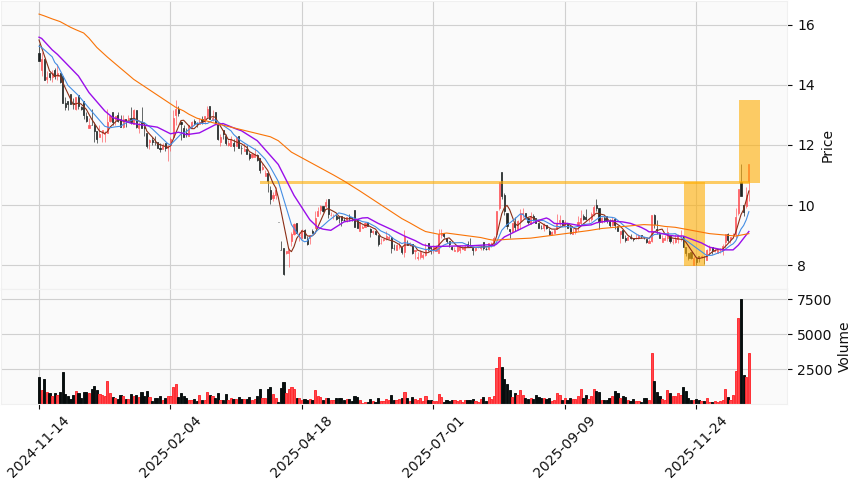

In [13]:
image = mysys.DrawOnKlineChart('6152','2024-11-14','2025-12-22',line_drawing_callback)
display(image)

籌碼面：  
法人大買(+552)：外資大買(+568)、投信中立(0)、自營小賣(-16)。  
主力大買(+517)。  
分公司買賣家數差集中(+81)。  
融資中立(0)、融券中立(0)。   